In [9]:
import pandas as pd
import numpy as np
import re
import os
os.chdir("C:/Users/Asus/Desktop/DATA SCIENCE/MAESTRIA/Data Mining/tp_data_mining")
data_path = "C:/Users/Asus/Desktop/DATA SCIENCE/MAESTRIA/Data Mining/tp_data_mining/data"

In [2]:
filename = "genres_by_artist_id.csv"

In [155]:
genres = pd.read_csv(data_path+"/"+filename, encoding='iso-8859-1')
genres = genres.dropna().reset_index(drop=True)
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_id    519 non-null    object
 1   artist_name  519 non-null    object
 2   genres       519 non-null    object
dtypes: object(3)
memory usage: 12.3+ KB


In [15]:
generos = ",".join(genres.genres.to_list()).split(",")

from collections import Counter
counter = Counter()
for gen in generos: 
    counter[gen] += 1

ocurrences = pd.DataFrame(counter.items(), columns=['genre', 'counts']).sort_values(by="counts", ascending=False).reset_index(drop=True)

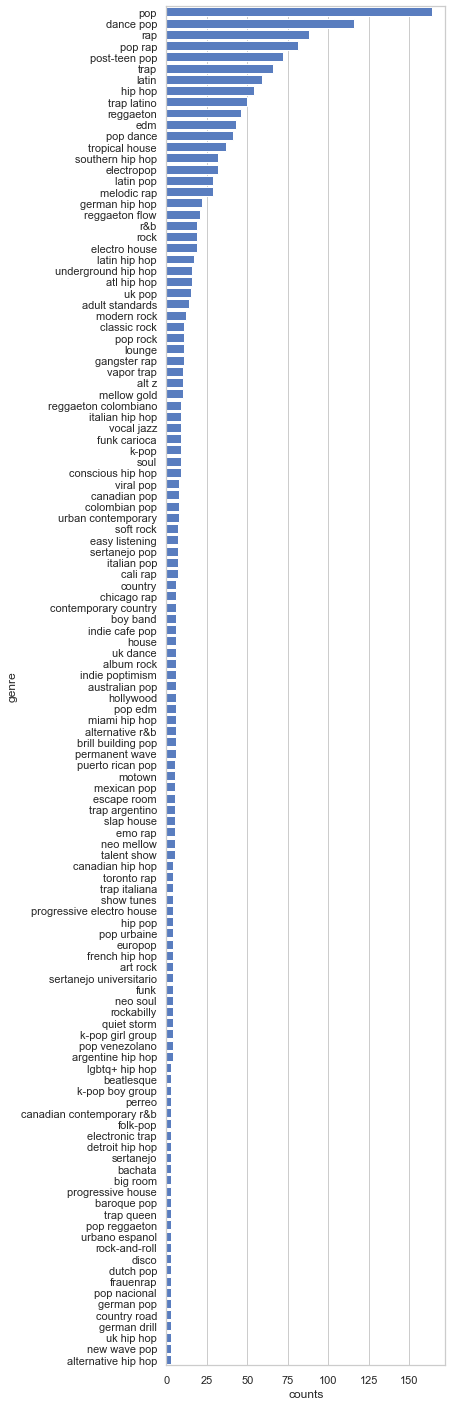

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

plt.rcParams['figure.figsize'] = (5,25)
fig, ax = plt.subplots()

lowbound = 2
graphic = ocurrences[ocurrences.counts>lowbound].reset_index(drop=True)

sns.set_color_codes("muted")
sns.barplot(x="counts", y="genre", data=graphic,
            label="Counts by Genre", color="b")

plt.show()

In [109]:
ocurrences["n_words"] = ocurrences.genre.apply(lambda x: len(x.split(" ")))
ocurrences["length"] = ocurrences.genre.apply(lambda x: len(x))

In [122]:
ocurrences.iloc[:50]

,genre,counts,n_words,length
0,pop,164,1,3
1,dance pop,116,2,9
2,rap,88,1,3
3,pop rap,81,2,7
4,post-teen pop,72,2,13
5,trap,66,1,4
6,latin,59,1,5
7,hip hop,54,2,7
8,trap latino,50,2,11
9,reggaeton,46,1,9


In [123]:
truth_genres = {'rap':'rap',
                'pop':'pop',
                'rock':'rock',
                'urban':'urban',
                'soul':'soul',
                'alternative':"alternative",
                "escape room":"escape-room",
                "dancehall":"dancehall",
                "punk":'punk',
                "reggae":"reggae",
                "reggaeton":"reggaeton",
                "latin":"latin",
                "funk":"funk",
                "hip hop":"hip-hop",
                "kpop":"k-pop",
                "jazz":"jazz",
                "blues":"blues",
                "celtic":"celtic",
                "salsa":"salsa",
                "trap":"trap",
                "house":"house",
                "r&b":"r&b",
                "edm": "dance",
                "lounge":"lounge",
                "country":"country",
                "dance":"dance",
                "folk":"folk",
                "swing":"swing",
                "tropical":"tropical",
                "indie":"indie",
                "wave":"wave",
                "emo":"emo",
                "rockabilly":"rockabilly",
                "sertanejo":"sertanejo",
                "bachata":"bachata",
                "urbano":"urban",
                "disco":"disco", 
                "trance":"trance",
                "basshall":"basshall",
                "a cappella":"a-capella",
                "gqom":"gqom",
                "musical advocacy":"musical-advocacy",
                "krap":"k-rap",
                "heavy metal":"heavy-metal",
                "mellow":"mellow"}

In [150]:
gens = np.unique(np.array(",".join(genres.genres).split(","))).tolist()

gens_dict = {}
for k,v in zip(gens,gens): 
    gens_dict[k]=v
    if "pop" in k:
        gens_dict[k]="pop"
    if "r&b" in k:
        gens_dict[k]="r&b"
    if "folk" in k: 
        gens_dict[k]="folk"
    if "rock" in k:
        gens_dict[k]="rock"
    if "rap" in k:
        gens_dict[k]="rap"
    if "k-pop" in k:
        gens_dict[k]="kpop"
    if "k-rap" in k: 
        gens_dict[k]="krap"
    if "hip hop" in k: 
        gens_dict[k]="hip hop"
    if "trap" in k:
        gens_dict[k]="trap"
    if "soul" in k:
        gens_dict[k]="soul"
    if "country" in k:
        gens_dict[k]="country"
    if "house" in k: 
        gens_dict[k] = "house"
    if "techno" in k: 
        gens_dict[k] = "techno"
    if "heavy metal" in k: 
        gens_dict[k] = "heavy metal"
    if "psych" in k: 
        gens_dict[k] = "psych"
    if "punk" in k: 
        gens_dict[k] = "punk"
    if "dance" in k:
        gens_dict[k] = "dance"
    if "funk" in k: 
        gens_dict[k] = "funk"
    if "indie" in k: 
        gens_dict[k] = "indie"
    if "metal" in k: 
        gens_dict[k] = "heavy metal"
    if "industrial" in k:
        gens_dict[k] = "industrial"
    if "talent show" in k: 
        gens_dict[k] = "talent show"
    if "wave" in k:
        gens_dict[k]="new wave"
    if "reggae" in k: 
        gens_dict[k]="reggae"
    if "reggaeton" in k: 
        gens_dict[k] = "reggaeton"
    if "salsa" in k: 
        gens_dict[k] = "salsa"
    if "urban" in k: 
        gens_dict[k] = "urban"
    if "urbano" in k: 
        gens_dict[k] = "urbano"
    if "sertanejo" in k: 
        gens_dict[k] = "sertanejo"
    if "romantic" in k: 
        gens_dict[k] = "romantic"
    if "edm" in k: 
        gens_dict[k] = "dance"
    if "electronic" in k: 
        gens_dict[k] = "electronic"
    if "alternative" in k: 
        gens_dict[k] = "alternative"
    if "alt" in k: 
        gens_dict[k] = "alternative"
    if "mellow" in k: 
        gens_dict[k] = "mellow"
    if "hardcore" in k: 
        gens_dict[k] = "hardcore"
    if "drill" in k: 
        gens_dict[k] = "drill"
    if "afro" in k: 
        gens_dict[k]="afro"

gens_dict

{'a cappella': 'a cappella',
 'acoustic pop': 'pop',
 'adult standards': 'adult standards',
 'afrofuturism': 'afro',
 'afrofuturismo brasileiro': 'afro',
 'afroswing': 'afro',
 'alabama rap': 'rap',
 'albanian hip hop': 'hip hop',
 'album rock': 'rock',
 'alt z': 'alternative',
 'alternative hip hop': 'alternative',
 'alternative metal': 'alternative',
 'alternative pop rock': 'alternative',
 'alternative r&b': 'alternative',
 'american folk revival': 'folk',
 'argentine hip hop': 'hip hop',
 'argentine indie': 'indie',
 'art pop': 'pop',
 'art rock': 'rock',
 'atl hip hop': 'hip hop',
 'atl trap': 'trap',
 'australian dance': 'dance',
 'australian pop': 'pop',
 'australian psych': 'psych',
 'australian rock': 'rock',
 'bachata': 'bachata',
 'baroque pop': 'pop',
 'bass trap': 'trap',
 'basshall': 'basshall',
 'baton rouge rap': 'rap',
 'beatlesque': 'beatlesque',
 'belgian dance': 'dance',
 'belgian edm': 'dance',
 'big band': 'big band',
 'big room': 'big room',
 'blues rock': 'rock'

In [154]:
def clean_genre(text):
    Split = text.split(",")
    for i in range(len(Split)): 
        Split[i] = gens_dict[Split[i]]
    return Split

def most_frequent(List):
    return max(set(List), key = List.count)

def select_genre(text):
    List = clean_genre(text)
    mf = most_frequent(List)
    return mf

In [156]:
genres['select_genre'] = genres.genres.apply(lambda x: select_genre(x))
genres

,artist_id,artist_name,genres,select_genre
0,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"boy band,dance pop,pop",dance
1,17lzZA2AlOHwCwFALHttmp,2 Chainz,"atl hip hop,gangster rap,hip hop,pop rap,rap,s...",hip hop
2,1URnnhqYAYcrqrcwql10ft,21 Savage,"atl hip hop,rap,trap",trap
3,6fWVd57NKTalqvmjRd2t8Z,24kGoldn,cali rap,rap
4,5Rl15oVamLq7FbSb0NNBNy,5 Seconds of Summer,"boy band,dance pop,electropop,pop,post-teen pop",pop
...,...,...,...,...
514,487N2T9nIPEHrlTZLL3SQs,Zé Neto & Cristiano,"sertanejo,sertanejo pop,sertanejo universitario",sertanejo
515,5CiGnKThu5ctn9pBxv7DGa,benny blanco,"electropop,pop,pop rap",pop
516,2cFrymmkijnjDg9SS92EPM,blackbear,"electropop,pop,pop rap",pop
517,19i93sA0D7yS9dYoVNBqAA,tha Supreme,"italian hip hop,italian pop,trap italiana",trap


'C:\\Users\\Asus\\Desktop\\DATA SCIENCE\\MAESTRIA\\Data Mining\\tp_data_mining'